In [97]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

wine = pd.read_csv("winequalityred.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.isnull().sum()  ## no null value
wine.shape

(1599, 12)

In [3]:
wine[['quality','fixed acidity']].groupby('quality').count().reset_index().rename(columns = {'fixed acidity':'count'})

,quality,count
0,3,10
1,4,53
2,5,681
3,6,638
4,7,199
5,8,18


In [4]:
## Following is just regular split - Need to do stratified split in next revision
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine, test_size=0.2, random_state=42)
print("train size %s, test size %s"%(train_set.shape,test_set.shape))

train size (1279, 12), test size (320, 12)


In [5]:
df1 = train_set[['quality','fixed acidity']].groupby('quality').count().reset_index().rename(columns = {'fixed acidity':'count'})
df2 = test_set[['quality','fixed acidity']].groupby('quality').count().reset_index().rename(columns = {'fixed acidity':'count'})
df3 = pd.merge(df1,df2,on='quality', how='outer')
df3

,quality,count_x,count_y
0,3,9,1
1,4,43,10
2,5,551,130
3,6,506,132
4,7,157,42
5,8,13,5


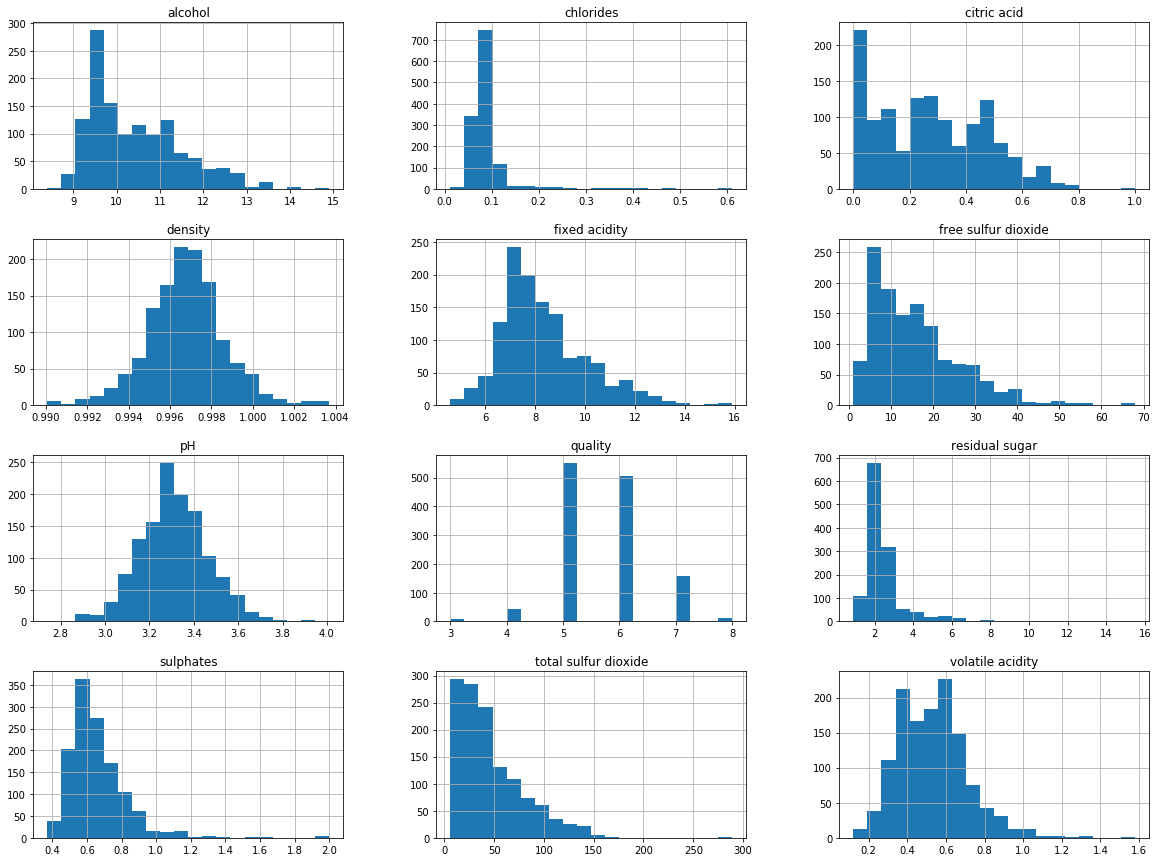

In [14]:
%matplotlib inline
train_set.hist(bins=20, figsize=(20,15))
plt.show()

In [6]:
train_set['quality'].value_counts()

5    551
6    506
7    157
4     43
8     13
3      9
Name: quality, dtype: int64

In [7]:
## Find correlation
corr_matrix = train_set.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.472676
sulphates               0.242596
citric acid             0.216115
fixed acidity           0.122488
residual sugar          0.005425
pH                     -0.045185
free sulfur dioxide    -0.055860
chlorides              -0.126541
density                -0.167091
total sulfur dioxide   -0.200067
volatile acidity       -0.378372
Name: quality, dtype: float64

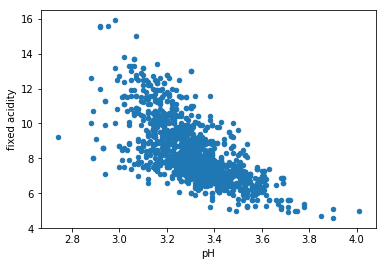

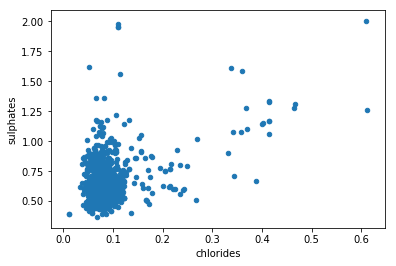

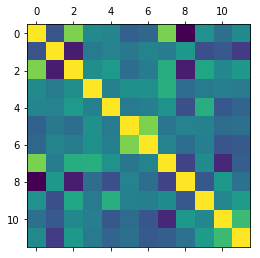

In [51]:
## Obsrv - PH and Fixed Acidity has negative correlation
## Obsrv - sulphates and chlorides have positive correlation
train_set.plot(kind="Scatter", x="pH", y="fixed acidity") 
train_set.plot(kind="Scatter", x="chlorides", y="sulphates") 
plt.matshow(corr_matrix)
plt.show()

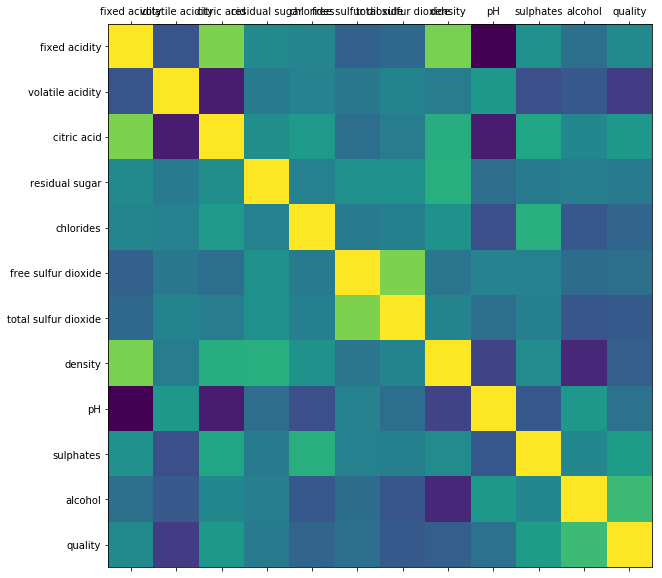

In [96]:
##Anotherway of showing correlation matrix
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(train_set)

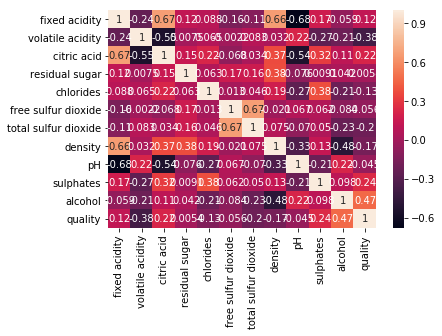

In [99]:
sns.heatmap(train_set.corr(), annot=True)

In [8]:
##Taking all the columns for modelling
x_train = train_set.drop('quality',axis=1)
y_train = train_set['quality']
x_test =  test_set.drop('quality',axis=1)
y_test = test_set['quality']
print("x_train size %s, y_train %s"%(x_train.shape,y_train.shape))
print("x_test size %s, y_test %s"%(x_test.shape,y_test.shape))
y_train = list(y_train)
y_test = list(y_test)


x_train size (1279, 11), y_train (1279,)
x_test size (320, 11), y_test (320,)


In [9]:
np.unique(y_train)

array([3, 4, 5, 6, 7, 8])

In [10]:
## Scaling all the feature
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  
print(x_test)

[[-3.61859850e-01  1.64286407e-01 -9.85152962e-01 ... -4.65392578e-01
  -1.34389336e-04 -7.77452782e-01]
 [-3.03840702e-01 -1.70525408e-01 -5.24491803e-01 ...  5.08915214e-01
  -1.03143815e+00 -8.72484283e-01]
 [ 1.37871461e+00  7.78108067e-01 -2.68568937e-01 ... -2.05577167e-01
   1.83329452e+00 -4.92358280e-01]
 ...
 [-1.37449586e-02  3.87494284e-01 -1.15015218e-01 ... -1.04997725e+00
  -7.44964886e-01 -5.87389780e-01]
 [ 2.76350785e-01 -1.45397070e+00  6.01568807e-01 ... -1.04997725e+00
   1.71749571e-01  7.43051230e-01]
 [ 4.50408230e-01  1.30822677e+00 -1.18989125e+00 ... -1.40623314e-01
  -6.87670232e-01 -6.82421281e-01]]


In [90]:
##training and prediction
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(x_train, y_train) 
comparedf = pd.DataFrame(columns={'Algorithm','correct_pred','incorrect_pred'})

In [91]:
##prediction
y_pred = classifier.predict(x_test)  
y_test_pred = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
data = ['Without_Stratified_KNN',len(y_test_pred[y_test==y_pred]),len(y_test_pred[y_test!=y_pred])]

# Append rows in Empty Dataframe by adding dictionaries
comparedf = comparedf.append({'Algorithm': 'Without_Stratified_KNN', 'correct_pred': len(y_test_pred[y_test==y_pred]), 'incorrect_pred': len(y_test_pred[y_test!=y_pred])}, ignore_index=True)
comparedf

,incorrect_pred,Algorithm,correct_pred
0,142,Without_Stratified_KNN,178


In [13]:
##Evaluate the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))   

[[ 0  0  0  1  0  0]
 [ 0  1  3  6  0  0]
 [ 0  1 94 34  1  0]
 [ 0  1 53 70  8  0]
 [ 0  1  6 22 13  0]
 [ 0  0  0  0  5  0]]


In [14]:
#stratified training and test data prep
from sklearn.model_selection import StratifiedShuffleSplit
split  = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wine,wine['quality']):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]

strat_train_set.shape,strat_test_set.shape 


((1279, 12), (320, 12))

In [15]:
strat_train_set.shape, strat_test_set.shape
df4 = strat_train_set[['quality','fixed acidity']].groupby('quality').count().reset_index().rename(columns = {'fixed acidity':'count'})
df5 = strat_test_set[['quality','fixed acidity']].groupby('quality').count().reset_index().rename(columns = {'fixed acidity':'count'})
df6 = pd.merge(df4,df5,on='quality', how='outer')
df6

,quality,count_x,count_y
0,3,8,2
1,4,42,11
2,5,545,136
3,6,510,128
4,7,159,40
5,8,15,3


In [16]:
x_strat_train, x_strat_test = strat_train_set.drop('quality', axis=1), strat_test_set.drop('quality', axis=1)
y_strat_train, y_strat_test = strat_train_set['quality'], strat_test_set['quality']
x_strat_train.shape,y_strat_train.shape, x_strat_test.shape, y_strat_test.shape

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_strat_train)
x_strat_train = scaler.transform(x_strat_train)  
x_strat_test = scaler.transform(x_strat_test)  


In [92]:
## Trying KNeighborsClassifier Classifier
##training and prediction
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(x_strat_train, y_strat_train) 

y_pred1 = classifier.predict(x_strat_test)  
y_test_pred1 = pd.DataFrame({'y_strat_test':y_strat_test,'y_pred1':y_pred1})
comparedf = comparedf.append({'Algorithm': 'With_Stratified_KNN', 'correct_pred': len(y_test_pred1[y_strat_test==y_pred1]), 'incorrect_pred': len(y_test_pred1[y_strat_test!=y_pred1])}, ignore_index=True)
comparedf
### Stratified split works better


,incorrect_pred,Algorithm,correct_pred
0,142,Without_Stratified_KNN,178
1,130,With_Stratified_KNN,190


In [93]:
## Trying Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_strat_train,y_strat_train)
y_dt_pred = clf.predict(x_strat_test)
y_dt_test_pred1 = pd.DataFrame({'y_strat_test':y_strat_test,'y_pred1':y_dt_pred})
comparedf = comparedf.append({'Algorithm': 'With_Stratified_DT', 'correct_pred': len(y_dt_test_pred1[y_strat_test==y_dt_pred]), 'incorrect_pred': len(y_dt_test_pred1[y_strat_test!=y_dt_pred])}, ignore_index=True)
comparedf

### Decision tree classfier performs better than KNN Classifier

,incorrect_pred,Algorithm,correct_pred
0,142,Without_Stratified_KNN,178
1,130,With_Stratified_KNN,190
2,125,With_Stratified_DT,195


In [94]:
## Trying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_strat_train,y_strat_train)
y_rf_pred = clf.predict(x_strat_test)
y_rf_test_pred1 = pd.DataFrame({'y_strat_test':y_strat_test,'y_rf_pred':y_rf_pred})
comparedf = comparedf.append({'Algorithm': 'With_Stratified_RF', 'correct_pred': len(y_rf_test_pred1[y_strat_test==y_rf_pred]), 'incorrect_pred': len(y_rf_test_pred1[y_strat_test!=y_rf_pred])}, ignore_index=True)



In [100]:
comparedf[['Algorithm', 'incorrect_pred', 'correct_pred']]

,Algorithm,incorrect_pred,correct_pred
0,Without_Stratified_KNN,142,178
1,With_Stratified_KNN,130,190
2,With_Stratified_DT,125,195
3,With_Stratified_RF,111,209


In [102]:
from keras import Sequential
from keras.layers import Dense

C:\Users\rajee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
